# Upload data

In [1]:
# prompt: upload data file

from google.colab import files
uploaded = files.upload()


Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
Saving Val.csv to Val.csv


# Essentials Import


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data



In [3]:
sent_train = pd.read_csv('/content/Train.csv')
sent_val = pd.read_csv('/content/Val.csv')
sent_test = pd.read_csv('/content/Test.csv')

## Read the data

In [4]:
print("Training Data:")
print(sent_train.info())

print("Validation Data:")
print(sent_val.info())

print("Test Data:")
print(sent_test.info())

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    12575 non-null  object
 1   Label   12575 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 196.6+ KB
None
Validation Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1567 non-null   object
 1   Label   1567 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.6+ KB
None
Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1586 non-null   object
 1   Label   1586 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.9+ KB
None


# Some visualization of the data

In [ ]:
pd.set_option('display.max_colwidth', None)
print(sent_train.head())

                                                                                                             Data  \
0  মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোমায় কোথায় পামু. আমি তোমার সাথে যাবু. গান কমু তোমার মতো গলি ঘুরমু.   
1                এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায় এই তিনটা পুলিশ কে তরে সবার সামনে মেরে পেলা দরকার    
2                                                                                       ভাই আপনার কথাই যাদু রয়েছে   
3                                                                                     উওরটা আমার অনেক ভাল লেগেছে    
4                                              আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ? প্রাইভেট কার নিয়ে ?   

   Label  
0      1  
1      2  
2      1  
3      1  
4      0  


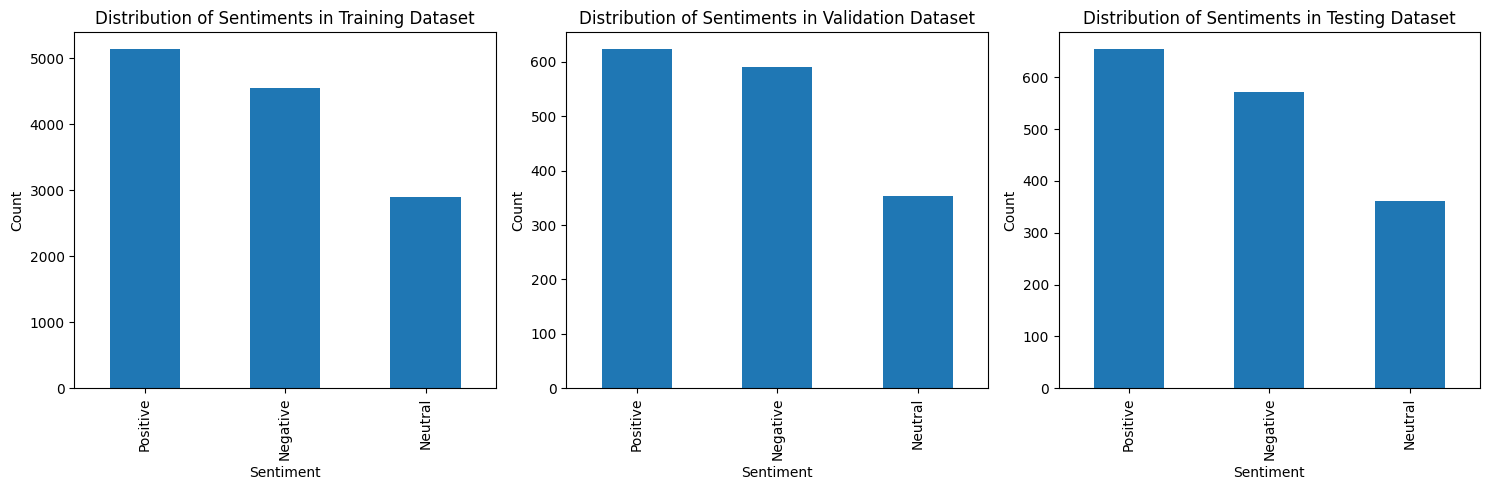

In [ ]:
# prompt: show a distribution of 'Label' and map '0' for neutral, '1' for positive and '2' for negative
# Create the plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 2 subplots

# Training plot
sent_train['Label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticks((0, 1, 2))
ax1.set_xticklabels(('Positive', 'Negative', 'Neutral'))
ax1.set_title('Distribution of Sentiments in Training Dataset')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')

# Validation plot
sent_val['Label'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_xticks((0, 1, 2))
ax2.set_xticklabels(('Positive', 'Negative', 'Neutral'))
ax2.set_title('Distribution of Sentiments in Validation Dataset')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')

# Testing plot
sent_test['Label'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_xticks((0, 1, 2))
ax3.set_xticklabels(('Positive', 'Negative', 'Neutral'))
ax3.set_title('Distribution of Sentiments in Testing Dataset')
ax3.set_xlabel('Sentiment')
ax3.set_ylabel('Count')

# Adjust layout and spacing
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


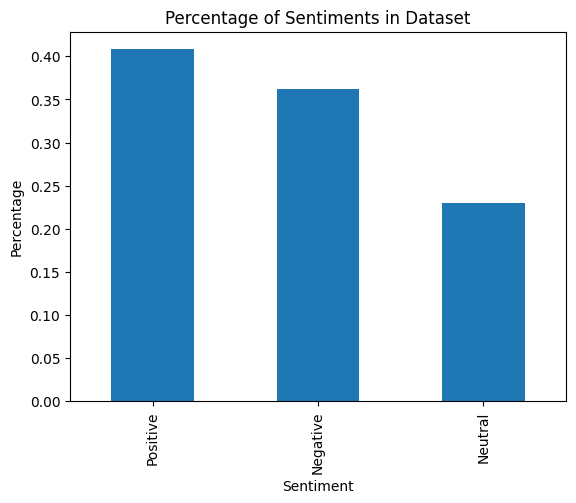

In [ ]:
# prompt: show the percentage of Label

sent_train['Label'].value_counts(normalize=True).plot(kind='bar')
plt.xticks((0,1,2),('Positive','Negative','Neutral'))
plt.title('Percentage of Sentiments in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


In [ ]:
# prompt: print count of label and total data

total_data = len(sent_train)
neutral_data = sent_train['Label'].value_counts()[0]
positive_data = sent_train['Label'].value_counts()[1]
negative_data = sent_train['Label'].value_counts()[2]



print("Number of datapoints:",total_data)
print("Number of positives:", positive_data, "Percentage:", round((positive_data/total_data)*100),"%")
print("Number of negatives:",negative_data, "Percentage:", round((negative_data/total_data)*100),"%")
print("Number of neutrals:",neutral_data, "Percentage:", round((neutral_data/total_data)*100),"%")


Number of datapoints: 12575
Number of positives: 5133 Percentage: 41 %
Number of negatives: 4548 Percentage: 36 %
Number of neutrals: 2894 Percentage: 23 %


## Calculate the average word count and unique word count of the data

Example list for testing



In [ ]:
example_data = ["ভাই আপনার কথাই যাদু রয়েছে। , ? | . ! *","ভাই আপনার কথাই","ভাই আপনার কথাই যাদু",]

# print(len(example_data.split()))

In [5]:
import string

def average_word_count(data, show_plots=True):
  total_words = 0
  all_lengths = []
  all_words = []
  for sentence in data:
    words = [word for word in sentence.split() if word not in string.punctuation and not word.isdigit()]
    total_words += len(words)
    all_words.extend(words)  # Add all words for uniqueness analysis
    all_lengths.append(len(words))
  avg_word_count = total_words / len(data)

  # Optionally display distribution of word lengths in each sentence
  if show_plots:
    plt.hist(all_lengths)
    plt.xlabel("Word Length")
    plt.ylabel("Frequency")
    plt.title("Distribution of Word Lengths in a Sentence")
    plt.axvline(avg_word_count, color='red', linestyle='dashed', linewidth=2, label=f"Average Word Length ({avg_word_count:.2f})")
    plt.xlim(1, 60)
    plt.grid()
    plt.show()

  unique_words = set(all_words)  # Use a set for efficient uniqueness

  return avg_word_count, len(unique_words)

# Uncomment for testing
# print(average_word_count(example_data, show_plots=False))


### Calculating average word for training data

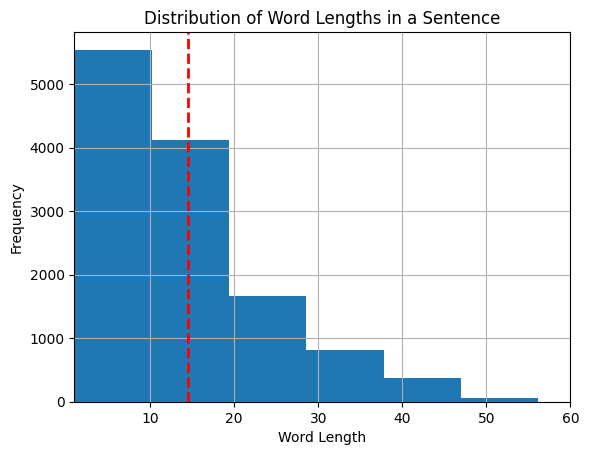

Average word:  14.489622266401591
Unique words:  24495


In [6]:
avg_word_train, unq_word_train = average_word_count(sent_train["Data"])

print("Average word: ", avg_word_train)
print("Unique words: ", unq_word_train)

### Calculating average word for validation data

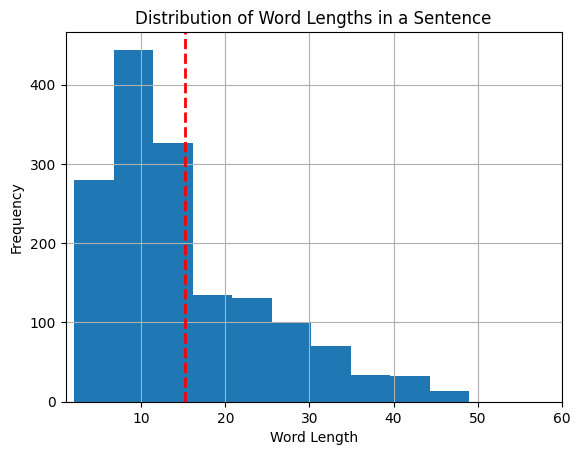

Average word:  15.179323548181237
Unique words:  6866


In [7]:
avg_word_val, unq_word_val = average_word_count(sent_val["Data"])

print("Average word: ", avg_word_val)
print("Unique words: ", unq_word_val)

# Tokenize the words

### Import from keras

In [8]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Instantiate tokenizer

In [9]:
tokenizer = Tokenizer(filters='[a-zA-Z0-9!"#$%&()*+,-./:;<=>?@[\]^_`{|।}~ ]+', lower= False)  # filter out english charecters and numbers

Fit on text

### For Testing

In [ ]:
example_data_2 = ["যাদু রয়েছে"]

example_combined = example_data + example_data_2

print(example_combined)

# tokenizer.fit_on_texts(example_data)

['ভাই আপনার কথাই যাদু রয়েছে। , ? | . ! *', 'ভাই আপনার কথাই', 'ভাই আপনার কথাই যাদু', 'যাদু রয়েছে']


# Should not do it, might overfit
## Combine data

In [10]:
# prompt: combine both sent_train['Data'] and sent_val['Data']

combined_data = pd.concat([sent_train['Data'], sent_val['Data']], axis=0)

print(len(combined_data))


14142


## Tokenize on only test data

In [ ]:
tokenizer.fit_on_texts(sent_train['Data'])

In [11]:
# tokenizer.fit_on_texts(sent_train['Data'])
tokenizer.fit_on_texts(combined_data)  # Fit on combined data


In [12]:
word2index = tokenizer.word_index
print(word2index)
print(len(word2index) + 1)

{'না': 1, 'আর': 2, 'ভাই': 3, 'করে': 4, 'এই': 5, 'কি': 6, 'ভালো': 7, 'আপনার': 8, 'অনেক': 9, 'হয়': 10, 'আমি': 11, 'থেকে': 12, 'জন্য': 13, 'আমার': 14, 'হবে': 15, 'এর': 16, 'ভিডিও': 17, 'সব': 18, 'তো': 19, 'একটা': 20, 'টাকা': 21, 'আপনি': 22, 'ও': 23, 'কোন': 24, 'আছে': 25, 'কে': 26, 'যে': 27, 'পুলিশ': 28, 'করা': 29, 'কিছু': 30, 'খাবার': 31, 'আমাদের': 32, 'কথা': 33, 'খুব': 34, 'মনে': 35, 'টা': 36, 'দিয়ে': 37, 'কিন্তু': 38, 'সাথে': 39, 'করতে': 40, 'মানুষ': 41, 'ভাইয়া': 42, 'এটা': 43, 'ধন্যবাদ': 44, 'নাই': 45, 'এবং': 46, 'আমরা': 47, 'যায়': 48, 'ভাল': 49, 'এ': 50, 'নিয়ে': 51, 'যদি': 52, 'এখন': 53, 'বলে': 54, 'কেন': 55, 'বেশি': 56, 'আল্লাহ': 57, 'লাগে': 58, 'দেখে': 59, 'হয়ে': 60, 'বাংলাদেশের': 61, 'তার': 62, 'করি': 63, 'দেশের': 64, 'এমন': 65, 'হোক': 66, 'করেন': 67, 'তাহলে': 68, 'চাই': 69, 'এত': 70, 'তাই': 71, 'পারে': 72, 'এক': 73, 'তাদের': 74, 'করার': 75, 'খেতে': 76, 'দিন': 77, 'বাংলাদেশ': 78, 'তবে': 79, 'একটু': 80, 'হচ্ছে': 81, 'সময়': 82, 'সুন্দর': 83, 'কাছে': 84, 'আগে': 85, 'হলে': 86, 'দেশে': 

## Text to sequence

## For training

In [13]:
X_train_tokens = tokenizer.texts_to_sequences(sent_train['Data'])

In [ ]:
print(X_train_tokens[:1])

[[1496, 58, 1004, 4243, 3, 2530, 6, 3608, 1949, 2530, 211, 4244, 10, 223, 38, 6975, 334, 3608, 223, 133, 1686, 6976]]


## For validation

In [14]:
X_val_tokens = tokenizer.texts_to_sequences(sent_val['Data'])

In [ ]:
print(X_val_tokens[:2])

[[3, 14, 9595, 1207, 7085, 5862, 523, 1698], [2, 30, 453, 501, 45, 25, 30, 28, 5288, 20213, 718, 3, 55, 525, 16, 1]]


## Pad the Xtokens

### Variable for max length

In [15]:
# Setting it manually. Should do it dynamically
max_len = 20

In [16]:
Xtrain = pad_sequences(X_train_tokens, maxlen=max_len, padding = "post", truncating = 'post')
Xval = pad_sequences(X_val_tokens, maxlen=max_len, padding = "post", truncating = 'post')

In [ ]:
print(Xtrain)

[[1496   58 1004 ... 3608  223  133]
 [   5  235  822 ...  118    0    0]
 [   2    7 1406 ...    0    0    0]
 ...
 [2995   69 3203 ... 5734   69 3203]
 [  79   46   29 ...    0    0    0]
 [6968 6652 2474 ...    0    0    0]]


In [ ]:
print(Xval)

[[   3   14 9595 ...    0    0    0]
 [   2   30  453 ...    0    0    0]
 [  10 3196    3 ...    2  466   22]
 ...
 [ 300   25   75 ... 1329   16  177]
 [ 375    2 2644 ...    4   70    5]
 [1775    7 1888 ...    0    0    0]]


### Ready the Ytrain and Yval

In [17]:
Ytrain = to_categorical(sent_train['Label'])
Yval = to_categorical(sent_val['Label'])

In [ ]:
print(Ytrain)
print(Yval)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


# Create the model

### Import

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SimpleRNN, GRU, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support


## Ready the test data

In [25]:
# Tokenize the words
Xtokens_test = tokenizer.texts_to_sequences(sent_test['Data'])

# Pad the Xtokens
Xtest = pad_sequences(Xtokens_test, maxlen=max_len, padding = "post", truncating = 'post')

# Ready the Ytest
Ytest = to_categorical(sent_test['Label'])

### Model

## A normal model

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=len(word2index) + 1, output_dim= 128, input_length=max_len))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 128)           3327616   
                                                                 
 bidirectional_4 (Bidirecti  (None, 20, 256)           263168    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 20, 256)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                

## Putting two bidirectional lstm essentially doing the same thing as elmo embedding
### Not really. But this will do for now

In [ ]:
# prompt: make me a model using 2 bidirectional lstm and 1 lstm and dense layer

model = Sequential()

model.add(Embedding(input_dim=len(word2index) + 1, output_dim= 100, input_length=max_len))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           2599700   
                                                                 
 bidirectional_2 (Bidirecti  (None, 20, 256)           234496    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 20, 256)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 20, 128)           164352    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)               

## Model with Simple RNN

In [27]:
# prompt: make me a model using 2 bidirectional lstm and 1 lstm and dense layer

simpleRnnModel = Sequential()

simpleRnnModel.add(Embedding(input_dim=len(word2index) + 1, output_dim= 100, input_length=max_len))

simpleRnnModel.add(Bidirectional(LSTM(128, return_sequences=True)))
simpleRnnModel.add(Dropout(0.2))
simpleRnnModel.add(Bidirectional(LSTM(64, return_sequences=True)))
simpleRnnModel.add(Dropout(0.2))
simpleRnnModel.add(SimpleRNN(32))
simpleRnnModel.add(Dropout(0.2))
simpleRnnModel.add(Dense(units=3, activation='softmax'))

simpleRnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simpleRnnModel.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           2599700   
                                                                 
 bidirectional_4 (Bidirecti  (None, 20, 256)           234496    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 20, 256)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 20, 128)           164352    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 20, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)               

In [37]:
train_and_test(simpleRnnModel)

Epoch 1/10
393/393 [==============================] - 33s 84ms/step - loss: 0.2215 - accuracy: 0.9252 - val_loss: 0.9186 - val_accuracy: 0.6937
Epoch 2/10
393/393 [==============================] - 17s 43ms/step - loss: 0.1181 - accuracy: 0.9618 - val_loss: 1.0934 - val_accuracy: 0.6841
Epoch 3/10
393/393 [==============================] - 15s 39ms/step - loss: 0.0837 - accuracy: 0.9730 - val_loss: 1.1820 - val_accuracy: 0.6771
Epoch 4/10
393/393 [==============================] - 15s 38ms/step - loss: 0.0602 - accuracy: 0.9790 - val_loss: 1.4244 - val_accuracy: 0.6822
Epoch 5/10
393/393 [==============================] - 15s 39ms/step - loss: 0.0559 - accuracy: 0.9792 - val_loss: 1.4096 - val_accuracy: 0.6771
Epoch 6/10
49/49 [==============================] - 0s 7ms/step - loss: 1.4876 - accuracy: 0.6854
Test loss: 1.4875847101211548
Test accuracy: 0.685386061668396
50/50 [==============================] - 0s 6ms/step
Precision: [0.49324324 0.72086331 0.72605042]
Recall: [0.40443213 

## Model with 2 lstm input same

In [33]:
# prompt: make me a model using 2 bidirectional lstm and 1 lstm and dense layer

sameLSTMModel = Sequential()

sameLSTMModel.add(Embedding(input_dim=len(word2index) + 1, output_dim= 128, input_length=max_len))

sameLSTMModel.add(Bidirectional(LSTM(128, return_sequences=True)))
sameLSTMModel.add(Dropout(0.2))
sameLSTMModel.add(Bidirectional(LSTM(128, return_sequences=True)))
sameLSTMModel.add(Dropout(0.2))
sameLSTMModel.add(LSTM(32))
sameLSTMModel.add(Dropout(0.2))
sameLSTMModel.add(Dense(units=3, activation='softmax'))

sameLSTMModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
sameLSTMModel.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 128)           3327616   
                                                                 
 bidirectional_6 (Bidirecti  (None, 20, 256)           263168    
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 20, 256)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 20, 256)           394240    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 20, 256)           0         
                                                                 
 lstm_8 (LSTM)               (None, 32)               

## This is the best by far

In [38]:
train_and_test(sameLSTMModel)

Epoch 1/10
393/393 [==============================] - 16s 40ms/step - loss: 0.4731 - accuracy: 0.8169 - val_loss: 0.7734 - val_accuracy: 0.6879
Epoch 2/10
393/393 [==============================] - 8s 21ms/step - loss: 0.2547 - accuracy: 0.9139 - val_loss: 0.8578 - val_accuracy: 0.6784
Epoch 3/10
393/393 [==============================] - 7s 19ms/step - loss: 0.1473 - accuracy: 0.9505 - val_loss: 1.1947 - val_accuracy: 0.6847
Epoch 4/10
393/393 [==============================] - 6s 17ms/step - loss: 0.1040 - accuracy: 0.9648 - val_loss: 1.3434 - val_accuracy: 0.6841
Epoch 5/10
393/393 [==============================] - 7s 18ms/step - loss: 0.0824 - accuracy: 0.9718 - val_loss: 1.2614 - val_accuracy: 0.6905
Epoch 6/10
49/49 [==============================] - 0s 7ms/step - loss: 1.3930 - accuracy: 0.6975
Test loss: 1.3929638862609863
Test accuracy: 0.6975111961364746
50/50 [==============================] - 0s 6ms/step
Precision: [0.47826087 0.74509804 0.74048443]
Recall: [0.45706371 0.7

## Direct dense with no middle lstm model

In [46]:
DirectDenseModel = Sequential()

DirectDenseModel.add(Embedding(input_dim=len(word2index) + 1, output_dim= 128, input_length=max_len))

DirectDenseModel.add(Bidirectional(LSTM(128, return_sequences=True)))
DirectDenseModel.add(Dropout(0.2))
DirectDenseModel.add(Bidirectional(LSTM(128, return_sequences=False)))
DirectDenseModel.add(Dropout(0.2))
DirectDenseModel.add(BatchNormalization())
DirectDenseModel.add(Dense(units=3, activation='softmax'))

DirectDenseModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
DirectDenseModel.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 128)           3327616   
                                                                 
 bidirectional_14 (Bidirect  (None, 20, 256)           263168    
 ional)                                                          
                                                                 
 dropout_17 (Dropout)        (None, 20, 256)           0         
                                                                 
 bidirectional_15 (Bidirect  (None, 256)               394240    
 ional)                                                          
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)              

In [47]:
train_and_test(DirectDenseModel)

Epoch 1/10
393/393 [==============================] - 27s 46ms/step - loss: 0.8563 - accuracy: 0.6146 - val_loss: 0.8979 - val_accuracy: 0.6560
Epoch 2/10
393/393 [==============================] - 9s 22ms/step - loss: 0.4311 - accuracy: 0.8376 - val_loss: 0.8758 - val_accuracy: 0.6631
Epoch 3/10
393/393 [==============================] - 6s 16ms/step - loss: 0.2255 - accuracy: 0.9276 - val_loss: 1.0802 - val_accuracy: 0.6726
Epoch 4/10
393/393 [==============================] - 7s 17ms/step - loss: 0.1518 - accuracy: 0.9555 - val_loss: 1.0125 - val_accuracy: 0.6713
Epoch 5/10
393/393 [==============================] - 6s 16ms/step - loss: 0.1120 - accuracy: 0.9672 - val_loss: 1.5606 - val_accuracy: 0.6560
Epoch 6/10
393/393 [==============================] - 7s 17ms/step - loss: 0.0937 - accuracy: 0.9728 - val_loss: 1.3463 - val_accuracy: 0.6720
Epoch 7/10
49/49 [==============================] - 0s 6ms/step - loss: 1.5000 - accuracy: 0.6624
Test loss: 1.4999690055847168
Test accuracy

## Funtion to train and test model

In [36]:
# prompt: make a funtion that takes model as argument and train it, test it, and print the perfomance metrics

def train_and_test(model, Myepochs = 10):
  # Instantiate early stopping callback
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  # Train the model
  history = model.fit(Xtrain, Ytrain, epochs = Myepochs, validation_data=(Xval, Yval), callbacks=[early_stopping])
  # history = model.fit(Xtrain, Ytrain, epochs=20, batch_size=32, validation_data=(Xval, Yval), verbose=1)

  # Test the model

  # Evaluate the model
  score = model.evaluate(Xval, Yval, verbose=1)
  # Print the performance metrics
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])

  # Make predictions on the test data
  predictions = model.predict(Xtest)

  printPerformanceMetrics(predictions)


def printPerformanceMetrics(predictions):
  predictions_argmax = np.argmax(predictions, axis=1)
  precision, recall, f1, _ = precision_recall_fscore_support(sent_test['Label'], predictions_argmax)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 score:", np.mean(f1))
  # print("Support:", support)



## Run the model

### Without Validation

In [ ]:
model.fit(Xtrain, Ytrain, epochs=100)

### Run this with validation

In [ ]:
# Instantiate early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

## Run the elmo model here

In [29]:
model.fit(Xtrain, Ytrain, epochs=50, validation_data=(Xval, Yval), callbacks=[early_stopping])

NameError: name 'early_stopping' is not defined

In [30]:
model.fit(Xtrain, Ytrain, epochs=100, validation_data=(Xval, Yval), callbacks=[early_stopping])

NameError: name 'early_stopping' is not defined

In [ ]:
# prompt: use argmax on prediction

predictions = np.argmax(predictions, axis=1)
print(predictions)


## Elmo

In [ ]:
accuracy = np.mean(predictions == sent_test['Label'])

print("Accuracy: ", accuracy)

Accuracy:  0.6645649432534678


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(sent_test['Label'], predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", np.mean(f1))
# print("Support:", support)


Precision: [0.47560976 0.70114943 0.72953737]
Recall: [0.43213296 0.74617737 0.71803853]
F1 score: 0.6331784762608478


In [ ]:
accuracy = np.mean(predictions == sent_test['Label'])

print("Accuracy: ", accuracy)

Accuracy:  0.6746532156368222


In [ ]:
# prompt: calculate precisoin, recall and f1

from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(sent_test['Label'], predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", np.mean(f1))
# print("Support:", support)


Precision: [0.45744681 0.77348993 0.71172638]
Recall: [0.47645429 0.70489297 0.76532399]
F1 score: 0.647303288696525


In [ ]:
# prompt: show the metrics in a table format, also include the mean of combined precision,recall and f1

import pandas as pd

metrics = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1
})

print(metrics)

print("Mean Precision:", metrics['Precision'].mean())
print("Mean Recall:", metrics['Recall'].mean())
print("Mean F1 score:", metrics['F1 score'].mean())


   Precision    Recall  F1 score
0   0.457447  0.476454  0.466757
1   0.773490  0.704893  0.737600
2   0.711726  0.765324  0.737553
Mean Precision: 0.6475543752537885
Mean Recall: 0.6488904176614704
Mean F1 score: 0.647303288696525
